In [1]:
import numpy as np
import pandas as pd
import gudhi
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

Number of simplices=597618


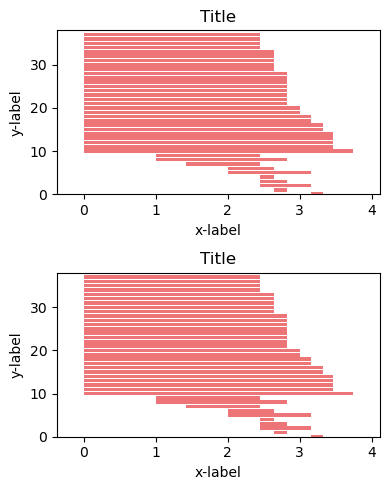

In [87]:
X = count_v.toarray()
distance_matrix = pairwise_distances(X, metric='euclidean')
distance_max = max(map(max, distance_matrix))

for i in range(len(X)-1):
    distance_matrix[i+1][i] = 0

rips_complex = gudhi.RipsComplex(distance_matrix=distance_matrix, max_edge_length=distance_max)

simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

message = "Number of simplices=" + repr(simplex_tree.num_simplices())
print(message)

simplex_tree.compute_persistence()
diag = simplex_tree.persistence_intervals_in_dimension(1)

#fig = plt.figure(figsize=(5, 3), dpi=100)
#ax = fig.add_subplot(111)


def plot_polet(ax):
    ax.set_xlabel('x-label')
    ax.set_ylabel('y-label')
    ax.set_title('Title')
    
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(4, 5), dpi=100)


gudhi.plot_persistence_barcode(diag, axes=ax1)
gudhi.plot_persistence_barcode(diag, axes=ax2)

plot_polet(ax1)
plot_polet(ax2)

fig.tight_layout()
plt.show()

In [86]:
#stemmer = SnowballStemmer("english")
#singles = [stemmer.stem(plural) for plural in word_tokenize(s)]

cv = CountVectorizer()

corpus = new_clothes.split('\n')

count_v = cv.fit(corpus) # cv.fit() creates the dictionary of all the unique words in the corpus.
print(count_v.vocabulary_)

count_v = cv.transform(corpus)
print(count_v.toarray())

df = pd.DataFrame(count_v.toarray(), columns = cv.get_feature_names())
df

{'double': 17, 'down': 18, 'finders': 26, 'keepers': 39, 'losers': 46, 'weepers': 92, 'welcome': 93, 'to': 86, 'the': 83, 'end': 22, 'of': 61, 'eras': 23, 'ice': 34, 'has': 32, 'melted': 50, 'back': 5, 'life': 45, 'done': 16, 'my': 57, 'time': 85, 'and': 3, 'served': 70, 'sentence': 69, 'dress': 19, 'me': 49, 'up': 88, 'watch': 91, 'die': 14, 'if': 35, 'it': 37, 'feels': 25, 'good': 31, 'tastes': 81, 'must': 56, 'be': 6, 'mine': 52, 'dynasty': 21, 'decapitated': 13, 'you': 98, 'just': 38, 'might': 51, 'see': 68, 'ghost': 30, 'tonight': 87, 'don': 15, 'know': 41, 'now': 60, 'taking': 79, 'crown': 12, 'all': 0, 'dressed': 20, 'naked': 58, 'what': 94, 'take': 78, 'oh': 62, 'yeah': 97, 'so': 73, 'close': 11, 'can': 8, 'taste': 80, 'sycophants': 77, 'on': 63, 'velvet': 89, 'sofas': 75, 'lavish': 42, 'mansions': 48, 'vintage': 90, 'wine': 95, 'am': 2, 'much': 55, 'more': 53, 'than': 82, 'royal': 65, 'snatch': 72, 'your': 99, 'chain': 10, 'mace': 47, 'eyes': 24, 'heroes': 33, 'always': 1, 'ge

,all,always,am,and,are,back,be,but,can,castles,...,vintage,watch,weepers,welcome,what,wine,world,yeah,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
58,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [124]:
print(simplex_tree.get_skeleton(1))

In [160]:
class PHI:
    def __init__(self, bare_text):
        self.bare_text = bare_text

    def text_bow(self, splitter='\n'):
        cv = CountVectorizer()
        corpus = self.bare_text.split(splitter)
        count_v = cv.fit(corpus) # cv.fit() creates the dictionary of all the unique words in the corpus.
        self.bow = cv.transform(corpus).toarray()
    
    def sif(self, max_dim=3):
        distance_matrix = pairwise_distances(self.bow, metric='euclidean')
        distance_max = max(map(max, distance_matrix))
        rips_complex = gudhi.RipsComplex(distance_matrix=distance_matrix, max_edge_length=distance_max)
        self.sif_simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dim)
        
    def sifts(self, max_dim=3):
        distance_matrix = pairwise_distances(self.bow, metric='euclidean')
        distance_max = max(map(max, distance_matrix))
        for i in range(len(self.bow)-1):
            distance_matrix[i+1][i] = 0
        rips_complex = gudhi.RipsComplex(distance_matrix=distance_matrix, max_edge_length=distance_max)
        self.sifts_simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dim)
        
    def barcode(self, dimentions=[0,1]):
        self.sif_simplex_tree.compute_persistence(min_persistence=0.3)
        self.sifts_simplex_tree.compute_persistence(min_persistence=0.3)
        sif_diag0 = self.sif_simplex_tree.persistence_intervals_in_dimension(dimentions[0])
        sif_diag1 = self.sif_simplex_tree.persistence_intervals_in_dimension(dimentions[1])
        sifts_diag0 = self.sifts_simplex_tree.persistence_intervals_in_dimension(dimentions[0])
        sifts_diag1 = self.sifts_simplex_tree.persistence_intervals_in_dimension(dimentions[1])

        fig, ((sif_ax0, sifts_ax0), (sif_ax1, sifts_ax1)) = plt.subplots(nrows=2, ncols=2, figsize=(5, 4), dpi=100)

        gudhi.plot_persistence_barcode(sif_diag0, axes=sif_ax0)
        gudhi.plot_persistence_barcode(sif_diag1, axes=sif_ax1)
        gudhi.plot_persistence_barcode(sifts_diag0, axes=sifts_ax0)
        gudhi.plot_persistence_barcode(sifts_diag1, axes=sifts_ax1)
        
        sif_ax0.set_title('SIF (dimention 0)')
        sif_ax1.set_title('SIF (dimention 1)')
        sifts_ax0.set_title('SIFTS (dimention 0)')
        sifts_ax1.set_title('SIFTS (dimention 1)')
        
        #sif_ax0.invert_yaxis()
        #sif_ax1.invert_yaxis()
        #sifts_ax0.invert_yaxis()
        #sifts_ax1.invert_yaxis()
        
        fig.tight_layout()
        plt.show()


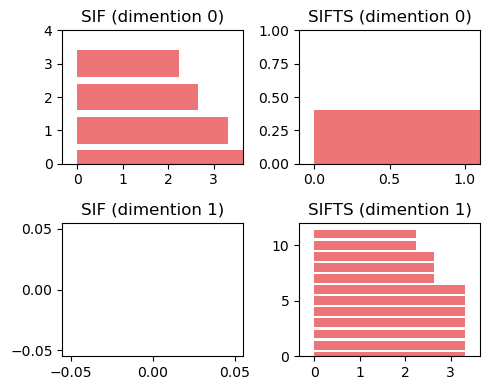

In [161]:
new_PHI = PHI(spider)
new_PHI.text_bow()
new_PHI.sif()
new_PHI.sifts()
new_PHI.barcode()

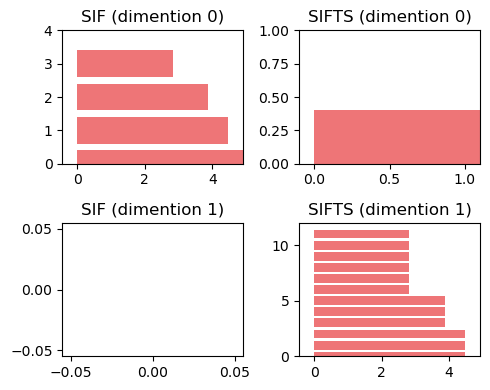

In [162]:
new_PHI = PHI(row_row_row)
new_PHI.text_bow()
new_PHI.sif()
new_PHI.sifts()
new_PHI.barcode()

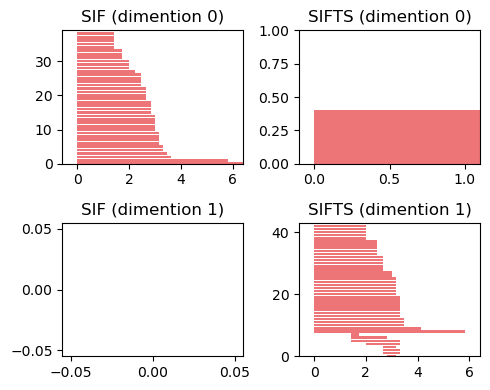

In [163]:
new_PHI = PHI(London_Bridge)
new_PHI.text_bow()
new_PHI.sif()
new_PHI.sifts()
new_PHI.barcode()

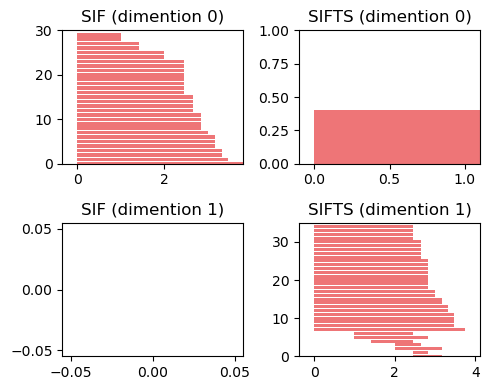

In [165]:
new_PHI = PHI(new_clothes)
new_PHI.text_bow()
new_PHI.sif()
new_PHI.sifts()
new_PHI.barcode()

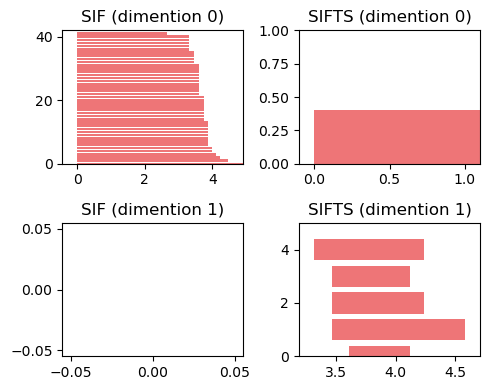

In [164]:
new_PHI = PHI(red_cap)
new_PHI.text_bow()
new_PHI.sif()
new_PHI.sifts()
new_PHI.barcode()

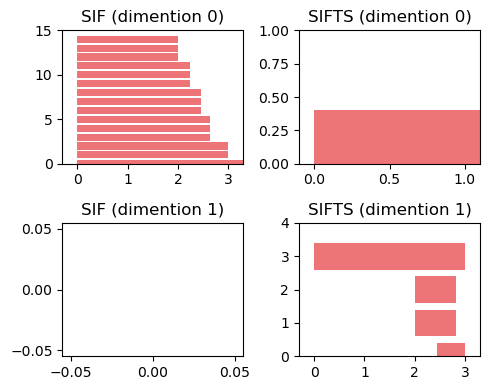

In [166]:
new_PHI = PHI(alice)
new_PHI.text_bow()
new_PHI.sif()
new_PHI.sifts()
new_PHI.barcode()

In [93]:
London_Bridge = '''Oh, shit (oh, shit, oh, shit)
Oh, shit (oh, shit, oh, shit)
Oh, shit (oh, shit, oh, shit)
Are you ready for this?
Oh, shit, oh, shit, oh, shit
Oh
It's me
Fergie
The Pen!
Polow
(Fergie, Ferg, what's up baby?)
When I come to the club, step aside (oh shit)
Part the seas, don't be having me in the line (oh shit)
VIP, 'cause you know I gotta shine (oh shit)
I'm Fergie Ferg, and me love you long time (oh shit)
All my girls get down on the floor (oh shit)
Back to back, drop it down real low (oh shit)
I'm such a lady, but I'm dancing like a hoe (oh shit)
'Cause you know I don't give a fuck, so here we go (oh shit)
How come every time you come around
My London, London Bridge wanna go down, like
London, London, London
Wanna go down like
London, London, London
Be going down like
How come every time you come around
My London, London Bridge wanna go down, like
London, London, London
Wanna go down like
London, London, London
Be going down like
Drinks start pouring
And my speech start slurring
Everybody start looking real good
That Grey Goose got your girl feeling loose
Now I'm wishing that I didn't wear these shoes (I hate heels)
It's like every time I get up on the dude
Paparazzi put my business in the news
And I'm like, get up out my face
Before I turn around and spray your ass with mace
My lips make you wanna have a taste
You got that, I got the bass
How come every time you come around
My London, London Bridge wanna go down, like
London, London, London
Wanna go down like
London, London, London
Be going down like
How come every time you come around
My London, London Bridge wanna go down, like
London, London, London
Wanna go down like
London, London, London
Be going down like
Aah, da, da, da, da, do, do, do, do
Me like a bullet type, you know they coming right
Fergie like 'em long time, my girls support 'em, right?
Aah, da, da, da, da, do, do, do, do
Me like a bullet type, you know they coming right
Fergie like 'em long time, my girls support 'em, right?
Another A-T-L
Cali callabo
Fergie and Polow
When I come to the club, step aside (oh shit)
Part the seas, don't be having me in the line (oh shit)
VIP, 'cause you know I gotta shine (oh shit)
I'm Fergie Ferg, and me love you long time (oh shit)
All my girls get down on the floor (oh shit)
Back to back, drop it down real low (oh shit)
I'm such a lady, but I'm dancing like a ho (oh shit)
'Cause you know I don't give a fuck, so here we go (oh shit)
How come every time you come around
My London, London Bridge wanna go down, like
London, London, London
Wanna go down like
London, London, London
Be going down like
How come every time you come around
My London, London Bridge wanna go down, like
London, London, London
Wanna go down like
London, London, London
Be going down like'''

In [85]:
new_clothes='''Double, double, double down
Finders keepers, losers weepers
Double, double, double down
Welcome to the end of eras
Ice has melted back to life
Done my time and served my sentence
Dress me up and watch me die
If it feels good, tastes good
It must be mine
Dynasty decapitated
You just might see a ghost tonight
Double, double, double down
And if you don't know now you know
I'm taking back the crown
I'm all dressed up and naked
I see what's mine and take it
(Finders keepers, losers weepers)
Oh yeah, the crown
So close I can taste it
I see what's mine and take it
(Finders keepers, losers weepers)
Oh yeah
Double, double, double down
Sycophants on velvet sofas
Lavish mansions, vintage wine
I am so much more than royal
Snatch your chain and mace your eyes
If it feels good, tastes good
It must be mine
Heroes always get remembered
But you know legends never die
Double, double, double down
And if you don't know now you know
I'm taking back the crown
I'm all dressed up and naked
I see what's mine and take it
(Finders keepers, losers weepers)
Oh yeah, the crown
So close I can taste it
I see what's mine and take it
(Finders keepers, losers weepers)
Oh yeah
Mortal kings are ruling castles
Welcome to my world of fun
Liars settle into sockets
Flip the switch and watch them run
Oh yeah, oh
(Finders keepers, losers weepers)
I'm taking back back
Taking back back the crown
I'm all dressed up and naked
I see what's mine and take it
(Finders keepers, losers weepers)
Oh yeah, the crown
So close I can taste it
I see what's mine and take it
(Finders keepers, losers weepers)
Oh yeah
Finders keepers, losers weepers
Double, double, double down
Finders keepers, losers weepers
Double, double, double down'''

In [105]:
row_row_row = '''Row, row, row your boat
Gently down the stream
Merrily merrily, merrily, merrily
Life is but a dream
Row, row, row your boat
Gently down the stream
Merrily merrily, merrily, merrily
Life is but a dream
Row, row, row your boat
Gently down the stream
Merrily merrily, merrily, merrily
Life is but a dream
Row, row, row your boat
Gently down the stream
Merrily merrily, merrily, merrily
Life is but a dream'''

In [120]:
spider = '''The itsy bitsy spider climbed up the water spout
Down came the rain, and washed the spider out
Out came the sun, and dried up all the rain
And the itsy bitsy spider went up the spout again
The itsy bitsy spider climbed up the water spout
Down came the rain, and washed the spider out
Out came the sun, and dried up all the rain
And the itsy bitsy spider went up the spout again
The itsy bitsy spider climbed up the water spout
Down came the rain, and washed the spider out
Out came the sun, and dried up all the rain
And the itsy bitsy spider went up the spout again
The itsy bitsy spider climbed up the water spout
Down came the rain, and washed the spider out
Out came the sun, and dried up all the rain
And the itsy bitsy spider went up the spout again'''

In [122]:
red_cap = '''At childhood’s end, the houses petered out
Into playing fields, the factory, allotments
Kept, like mistresses, by kneeling married men
The silent railway line, the hermit’s caravan
Till you came at last to the edge of the woods
It was there that I first clapped eyes on the wolf
He stood in a clearing, reading his verse out loud
In his wolfy drawl, a paperback in his hairy paw
Red wine staining his bearded jaw. What big ears
He had! What big eyes he had! What teeth!
In the interval, I made quite sure he spotted me
Sweet sixteen, never been, babe, waif, and bought me a drink
My first. You might ask why. Here’s why. Poetry
The wolf, I knew, would lead me deep into the woods
Away from home, to a dark tangled thorny place
Lit by the eyes of owls. I crawled in his wake
My stockings ripped to shreds, scraps of red from my blazer
Snagged on twig and branch, murder clues. I lost both shoes
But got there, wolf’s lair, better beware. Lesson one that night
Breath of the wolf in my ear, was the love poem
I clung till dawn to his thrashing fur, for
What little girl doesn’t dearly love a wolf?
Then I slid from between his heavy matted paws
And went in search of a living bird – white dove –
Which flew, straight, from my hands to his open mouth
One bite, dead. How nice, breakfast in bed, he said
Licking his chops. As soon as he slept, I crept to the back
Of the lair, where a whole wall was crimson, gold, aglow with books
Words, words were truly alive on the tongue, in the head
Warm, beating, frantic, winged; music and blood
But then I was young – and it took ten years
In the woods to tell that a mushroom
Stoppers the mouth of a buried corpse, that birds
Are the uttered thought of trees, that a greying wolf
Howls the same old song at the moon, year in, year out
Season after season, same rhyme, same reason. I took an axe
To a willow to see how it wept. I took an axe to a salmon
To see how it leapt. I took an axe to the wolf
As he slept, one chop, scrotum to throat, and saw
The glistening, virgin white of my grandmother’s bones
I filled his old belly with stones. I stitched him up
Out of the forest I come with my flowers, singing, all alone'''

In [124]:
alice = '''Alice in Wonderland
How do you get to Wonderland
Over the hill or underland
Or just behind the tree
When clouds go rolling by
They roll away and leave the sky
Where is the land beyond the eye
That people cannot see
Where can it be
Where do stars go
Where is the crescent moon
They must be somewhere in the sunny afternoon
Alice in Wonderland
Where is the path to Wonderland
Over the hill or here or there
I wonder where'''